# Extracting a dataset preprocessed and ready for decoding (and other population analyses)

### 1. Extract DFallpa using this helper function

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
animal = "Diego"
date = 230628
question = "PIG_BASE_trial" # holds variety of prepropoessing steps to clean data, specificalyl for PIG data.
list_time_windows = [(-0.6, 0.6)] # to slice data including just within this time window (realtive to events)
events_keep = ["00_fixon"]
combine_into_larger_areas = False
which_level = "saccade_fix_on"
SPIKES_VERSION = "tdt"
DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                    which_level=which_level,
                                    events_keep = events_keep,
                                    combine_into_larger_areas=combine_into_larger_areas,
                                    HACK_RENAME_SHAPES=False,
                                          SPIKES_VERSION=SPIKES_VERSION)

### For the above to work, you need to make the following work first

In [ ]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
from neuralmonkey.classes.session import load_mult_session_helper

# You need to add to the code to have it generate snippets aligned to saccade fixations.
# You can come up with a new "which_level", e.g., 
which_level = "saccade_fix_on"

MS = load_mult_session_helper(date, animal, spikes_version=SPIKES_VERSION)
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level, events_keep=events_keep)



# Quick description of DFallpa

In [4]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1_m,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 832, 120)"
1,trial,03_samp,M1_l,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(29, 832, 120)"
2,trial,03_samp,PMv_l,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 832, 120)"
3,trial,03_samp,PMv_m,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 832, 120)"
4,trial,03_samp,PMd_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(26, 832, 120)"
5,trial,03_samp,PMd_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(16, 832, 120)"
6,trial,03_samp,dlPFC_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 832, 120)"
7,trial,03_samp,vlPFC_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(31, 832, 120)"
8,trial,03_samp,vlPFC_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 832, 120)"
9,trial,03_samp,FP_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 832, 120)"


DFallpa holds population activity for each brain region. Each row is a single region. Each row has a "pa" object, which holds the population activity.

The data is in PA.X, in a matrix shape (nchans, ntrials, ntimes).

PA has many methods for manipulating, processing, and visualizing this population data.

Here, we will just pass PA into other function that take PA and do analyses, such as decoding.
    

### Example of stuff you can do with PA

##### Get a PA, just for example

In [5]:
pa = DFallpa["pa"].values[0]

##### WHere the data is stored in pa

In [10]:
# Neural data (nchans, ntrials, ntimes)
pa.X.shape

(32, 832, 120)

In [14]:
# The labels for chans tirals and times
print(pa.Times)
print(pa.Chans)
print(pa.Trials)

[-0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585  0.595]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0, 1, 2, 3, 4, 5, 6, 7, 8,

In [16]:
# Features associated with trials
pa.Xlabels["trials"][:10]

,taskconfig_shploc_SHSEM,seqc_5_center_binned,seqc_1_shapesem,seqc_5_angle_binned,shape_is_novel_list,seqc_1_shapesemcat,seqc_2_locx,index_datapt,taskconfig_shp_SHSEM,seqc_0_shape,...,seqc_5_locon_bin_in_loc,seqc_5_shape,seqc_5_locy,seqc_0_shapesemcat,seqc_5_shapesem,seqc_4_locon_binned,which_level,event,bregion,twind
0,"((arcdeep-RR-RR, (-1, 1)),)","(IGN, IGN)",IGN,IGN,"(False,)",IGN,NaN,"(230628-1-1,)","(arcdeep-RR-RR,)",arcdeep-4-3-0,...,"(IGN, IGN)",IGN,NaN,arcdeep,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
1,"((V-DD-DD, (1, 1)), (zigzagSq-LL-0.0, (-1, 1)))","(IGN, IGN)",zigzagSq-LL-0.0,IGN,"(False, False)",zigzagSq,NaN,"(230628-1-10,)","(V-DD-DD, zigzagSq-LL-0.0)",V-2-2-0,...,"(IGN, IGN)",IGN,NaN,V,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
2,"((V-DD-DD, (1, 1)), (zigzagSq-LL-0.0, (-1, 0)))","(IGN, IGN)",V-DD-DD,IGN,"(False, False)",V,NaN,"(230628-1-100,)","(V-DD-DD, zigzagSq-LL-0.0)",zigzagSq-1-1-1,...,"(IGN, IGN)",IGN,NaN,zigzagSq,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
3,"((V-DD-DD, (1, 1)),)","(IGN, IGN)",IGN,IGN,"(False,)",IGN,NaN,"(230628-1-101,)","(V-DD-DD,)",V-2-2-0,...,"(IGN, IGN)",IGN,NaN,V,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
4,"((arcdeep-RR-RR, (-1, 1)),)","(IGN, IGN)",IGN,IGN,"(False,)",IGN,NaN,"(230628-1-1013,)","(arcdeep-RR-RR,)",arcdeep-4-3-0,...,"(IGN, IGN)",IGN,NaN,arcdeep,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
5,"((zigzagSq-LL-0.0, (1, 1)),)","(IGN, IGN)",IGN,IGN,"(False,)",IGN,NaN,"(230628-1-1014,)","(zigzagSq-LL-0.0,)",zigzagSq-1-1-1,...,"(IGN, IGN)",IGN,NaN,zigzagSq,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
6,"((V-DD-DD, (1, 1)), (arcdeep-RR-RR, (-1, 1)), ...","(IGN, IGN)",zigzagSq-LL-0.0,IGN,"(False, False, False)",zigzagSq,-137.980702,"(230628-1-1015,)","(V-DD-DD, arcdeep-RR-RR, zigzagSq-LL-0.0)",V-2-2-0,...,"(IGN, IGN)",IGN,NaN,V,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
7,"((V-DD-DD, (-1, 0)), (arcdeep-RR-RR, (1, 1)))","(IGN, IGN)",V-DD-DD,IGN,"(False, False)",V,NaN,"(230628-1-1016,)","(V-DD-DD, arcdeep-RR-RR)",arcdeep-4-3-0,...,"(IGN, IGN)",IGN,NaN,arcdeep,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
8,"((arcdeep-RR-RR, (-1, 1)), (zigzagSq-LL-0.0, (...","(IGN, IGN)",arcdeep-RR-RR,IGN,"(False, False)",arcdeep,NaN,"(230628-1-1018,)","(arcdeep-RR-RR, zigzagSq-LL-0.0)",zigzagSq-1-1-1,...,"(IGN, IGN)",IGN,NaN,zigzagSq,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"
9,"((zigzagSq-LL-0.0, (1, 1)),)","(IGN, IGN)",IGN,IGN,"(False,)",IGN,NaN,"(230628-1-1019,)","(zigzagSq-LL-0.0,)",zigzagSq-1-1-1,...,"(IGN, IGN)",IGN,NaN,zigzagSq,IGN,"(IGN, IGN)",trial,03_samp,M1_m,"(-0.6, 0.6)"


##### Some data manipulation

In [6]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


Compare and see that times are binned
-- original: [-0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585  0.595] ... data shape:  (32, 832, 120)
-- sliced: [0.105 0.115 0.125 0.135 0.145 0.155 0.165 0.175 0.18

In [7]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


Compare and see that times are binned
-- original: [-0.595 -0.585 -0.575 -0.565 -0.555 -0.545 -0.535 -0.525 -0.515 -0.505
 -0.495 -0.485 -0.475 -0.465 -0.455 -0.445 -0.435 -0.425 -0.415 -0.405
 -0.395 -0.385 -0.375 -0.365 -0.355 -0.345 -0.335 -0.325 -0.315 -0.305
 -0.295 -0.285 -0.275 -0.265 -0.255 -0.245 -0.235 -0.225 -0.215 -0.205
 -0.195 -0.185 -0.175 -0.165 -0.155 -0.145 -0.135 -0.125 -0.115 -0.105
 -0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095
  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185  0.195
  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285  0.295
  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385  0.395
  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485  0.495
  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585  0.595] ... data shape:  (32, 832, 120)
-- sliced: [-0.545 -0.525 -0.505 -0.485 -0.465 -0.445 -0.425 -0.

##### Some plotting

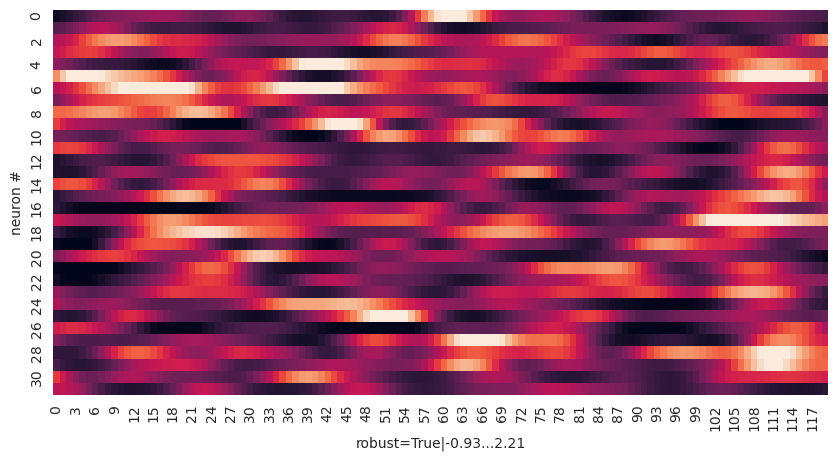

In [8]:
pa.plotNeurHeat(0)

# Decoding

### PREPROCESS - factorize all relevant labels FIRST here.


In [22]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

(('arcdeep-RR-RR', (-1, 1)),)  ---  0
(('V-DD-DD', (1, 1)), ('zigzagSq-LL-0.0', (-1, 1)))  ---  1
(('V-DD-DD', (1, 1)), ('zigzagSq-LL-0.0', (-1, 0)))  ---  2
(('V-DD-DD', (1, 1)),)  ---  3
(('zigzagSq-LL-0.0', (1, 1)),)  ---  4
(('V-DD-DD', (1, 1)), ('arcdeep-RR-RR', (-1, 1)), ('zigzagSq-LL-0.0', (-1, 0)))  ---  5
(('V-DD-DD', (-1, 0)), ('arcdeep-RR-RR', (1, 1)))  ---  6
(('arcdeep-RR-RR', (-1, 1)), ('zigzagSq-LL-0.0', (-1, 0)))  ---  7
(('arcdeep-RR-RR', (1, 1)),)  ---  8
(('V-DD-DD', (-1, 0)),)  ---  9
(('V-DD-DD', (-1, 0)), ('arcdeep-RR-RR', (-1, 1)), ('zigzagSq-LL-0.0', (1, 1)))  ---  10
(('V-DD-DD', (-1, 0)), ('arcdeep-RR-RR', (-1, 1)))  ---  11
(('arcdeep-RR-RR', (-1, 0)), ('zigzagSq-LL-0.0', (-1, 1)))  ---  12
(('arcdeep-RR-RR', (-1, 0)),)  ---  13
(('V-DD-DD', (-1, 0)), ('arcdeep-RR-RR', (1, 1)), ('zigzagSq-LL-0.0', (-1, 1)))  ---  14
(('V-DD-DD', (-1, 0)), ('zigzagSq-LL-0.0', (-1, 1)))  ---  15
(('arcdeep-RR-RR', (-1, 1)), ('zigzagSq-LL-0.0', (1, 1)))  ---  16
(('V-DD-DD', (-1

### 1) Default: Time-resolved decoding

In [23]:
SAVEDIR_ANALYSIS = "/tmp"
import os

In [24]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["seqc_0_shape"]
# list_vars_decode = ["seqc_2_shape"]
# list_vars_decode = ["shape_is_novel_all"]

# PARAMS
time_bin_size = 0.2 # binsize, to average over to get population vector of neural activity
slide = 0.2 # to slide the bin.
max_nsplits = 2 # n times to do cross-validation.

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)


/tmp/1_time_resolved
--- [filter_by_min_n], checking var= shape_this_event
level 0, keeping, n=69
level 1, keeping, n=69
level 2, keeping, n=75
(removing this many indices):  0
--- [filter_by_min_n], checking var= shape_this_event
level 1, keeping, n=121
level 2, keeping, n=204
level 0, keeping, n=294
(removing this many indices):  0
--- [filter_by_min_n], checking var= shape_this_event
level 0, keeping, n=69
level 1, keeping, n=69
level 2, keeping, n=75
(removing this many indices):  0
--- [filter_by_min_n], checking var= shape_this_event
level 1, keeping, n=121
level 2, keeping, n=204
level 0, keeping, n=294
(removing this many indices):  0
--- [filter_by_min_n], checking var= shape_this_event
level 0, keeping, n=69
level 1, keeping, n=69
level 2, keeping, n=75
(removing this many indices):  0
--- [filter_by_min_n], checking var= shape_this_event
level 1, keeping, n=121
level 2, keeping, n=204
level 0, keeping, n=294
(removing this many indices):  0
--- [filter_by_min_n], checking va

### 2) Cross-condition decoding

In [ ]:
# For each time bin, decode shape genearlizing across location

In [26]:
SAVEDIR = "/tmp"

In [27]:
from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS

# Context
list_var_decode = [
    "seqc_0_shape",
]
list_vars_conj = [
    ["seqc_0_loc", "task_kind"], # minimal control
    ]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



03_samp M1_m (-0.6, 0.6) seqc_0_shape
03_samp M1_m (-0.6, 0.6) seqc_0_shape
03_samp M1_l (-0.6, 0.6) seqc_0_shape
03_samp M1_l (-0.6, 0.6) seqc_0_shape
03_samp PMv_l (-0.6, 0.6) seqc_0_shape
03_samp PMv_l (-0.6, 0.6) seqc_0_shape
03_samp PMv_m (-0.6, 0.6) seqc_0_shape
03_samp PMv_m (-0.6, 0.6) seqc_0_shape
03_samp PMd_p (-0.6, 0.6) seqc_0_shape
03_samp PMd_p (-0.6, 0.6) seqc_0_shape
03_samp PMd_a (-0.6, 0.6) seqc_0_shape
03_samp PMd_a (-0.6, 0.6) seqc_0_shape
03_samp dlPFC_a (-0.6, 0.6) seqc_0_shape
03_samp dlPFC_a (-0.6, 0.6) seqc_0_shape
03_samp vlPFC_p (-0.6, 0.6) seqc_0_shape
03_samp vlPFC_p (-0.6, 0.6) seqc_0_shape
03_samp vlPFC_a (-0.6, 0.6) seqc_0_shape
03_samp vlPFC_a (-0.6, 0.6) seqc_0_shape
03_samp FP_p (-0.6, 0.6) seqc_0_shape
03_samp FP_p (-0.6, 0.6) seqc_0_shape
03_samp FP_a (-0.6, 0.6) seqc_0_shape
03_samp FP_a (-0.6, 0.6) seqc_0_shape
03_samp SMA_p (-0.6, 0.6) seqc_0_shape
03_samp SMA_p (-0.6, 0.6) seqc_0_shape
03_samp SMA_a (-0.6, 0.6) seqc_0_shape
03_samp SMA_a (-0.6, 

### 2b) Within-condition decoding. Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [29]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

In [30]:
SAVEDIR = "/tmp"

In [31]:
# PARAMS

separate_by_task_kind = True

# Context
# Context
list_var_decode = [
    "seqc_0_shape",
]
list_vars_conj = [
    ["seqc_0_loc", "task_kind"], # minimal control
    ]
filtdict = None
# filtdict = {
#     "stroke_index":[0,3,4,5,6,7,8],
# }

# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


03_samp M1_m (-0.6, 0.6) prims_single seqc_0_shape
03_samp M1_m (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp M1_l (-0.6, 0.6) prims_single seqc_0_shape
03_samp M1_l (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp PMv_l (-0.6, 0.6) prims_single seqc_0_shape
03_samp PMv_l (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp PMv_m (-0.6, 0.6) prims_single seqc_0_shape
03_samp PMv_m (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp PMd_p (-0.6, 0.6) prims_single seqc_0_shape
03_samp PMd_p (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp PMd_a (-0.6, 0.6) prims_single seqc_0_shape
03_samp PMd_a (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp dlPFC_a (-0.6, 0.6) prims_single seqc_0_shape
03_samp dlPFC_a (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp vlPFC_p (-0.6, 0.6) prims_single seqc_0_shape
03_samp vlPFC_p (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp vlPFC_a (-0.6, 0.6) prims_single seqc_0_shape
03_samp vlPFC_a (-0.6, 0.6) prims_on_grid seqc_0_shape
03_samp FP_p (-0.6, 0.6) prims_single seqc_0_sh

# Plots to visualize population activity (e.g, plot neural trajectories in lower dimensions, colored and split by variables of interest)

In [32]:
DFallpa

,which_level,event,bregion,twind,pa,pa_x_shape
0,trial,03_samp,M1_m,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 832, 120)"
1,trial,03_samp,M1_l,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(29, 832, 120)"
2,trial,03_samp,PMv_l,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(32, 832, 120)"
3,trial,03_samp,PMv_m,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 832, 120)"
4,trial,03_samp,PMd_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(26, 832, 120)"
5,trial,03_samp,PMd_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(16, 832, 120)"
6,trial,03_samp,dlPFC_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(30, 832, 120)"
7,trial,03_samp,vlPFC_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(31, 832, 120)"
8,trial,03_samp,vlPFC_a,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 832, 120)"
9,trial,03_samp,FP_p,"(-0.6, 0.6)",<neuralmonkey.classes.population.PopAnal objec...,"(24, 832, 120)"


In [ ]:
# Do PCA to plot projection to first 2 PCs


(29, 832, 120)


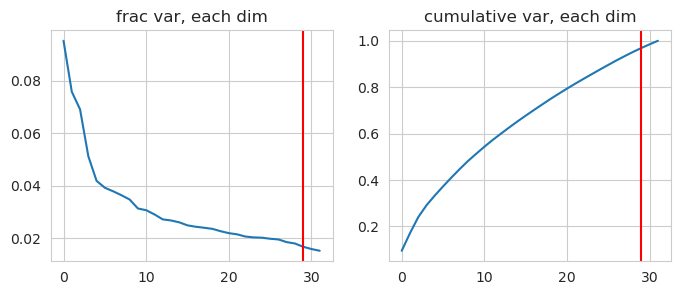

In [43]:
X, pathis = pa.dataextract_state_space_decode_flex(twind, pca_reduce=True, plot_pca_explained_var=True)
print(X.shape)


(<Figure size 1050x350 with 3 Axes>,
 array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>], dtype=object))

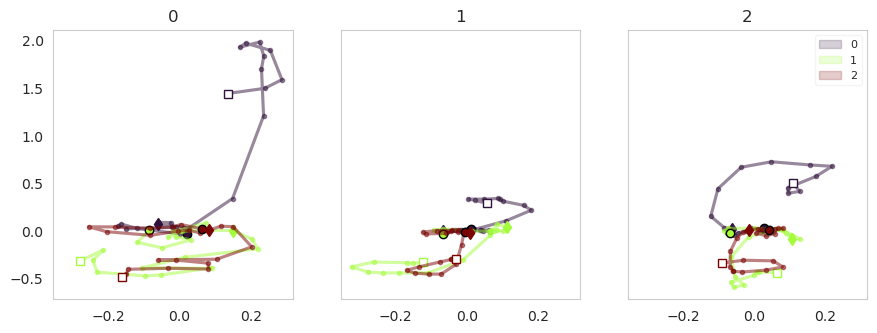

In [51]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby
from neuralmonkey.classes.population_mult import extract_single_pa

DO_PCA = True

# Plot an example brain region's data.
bregion = "PMv_m"
twind = (-0.6, 0.6)
which_level = "trial"
event = "03_samp"
pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)

# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
if DO_PCA:
    X, _ = pa.dataextract_state_space_decode_flex(twind)
else:
    X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

(<Figure size 1050x350 with 3 Axes>,
 array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>], dtype=object))

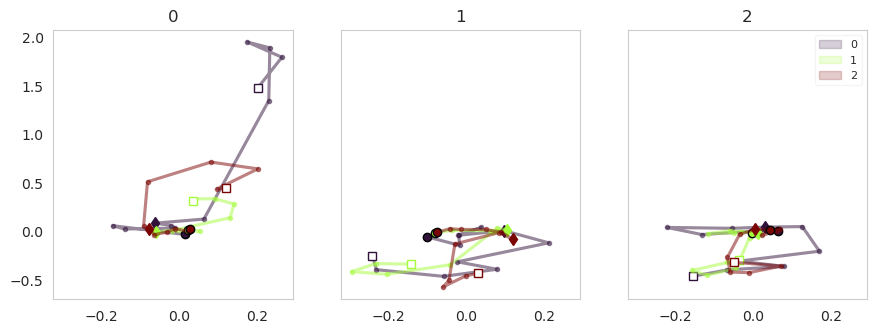

In [52]:
# Same, but coloring by location

var_color_by = "seqc_0_loc"
var_subplots = "seqc_0_shape"

# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
X = pa.X # (chans, trials, times)
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (0,1) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.1 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)